# CASE STUDY 1:CONVERTING CASUAL CYCLISTS RIDERS TO ANNUAL MEMBERS

This document will describe the work done to determinate how annual riders and casual riders use Divvy’s bikes differently using the Google Analytics process, APPASA (Ask, Prepare, Process, Analyze, Share and Act). 

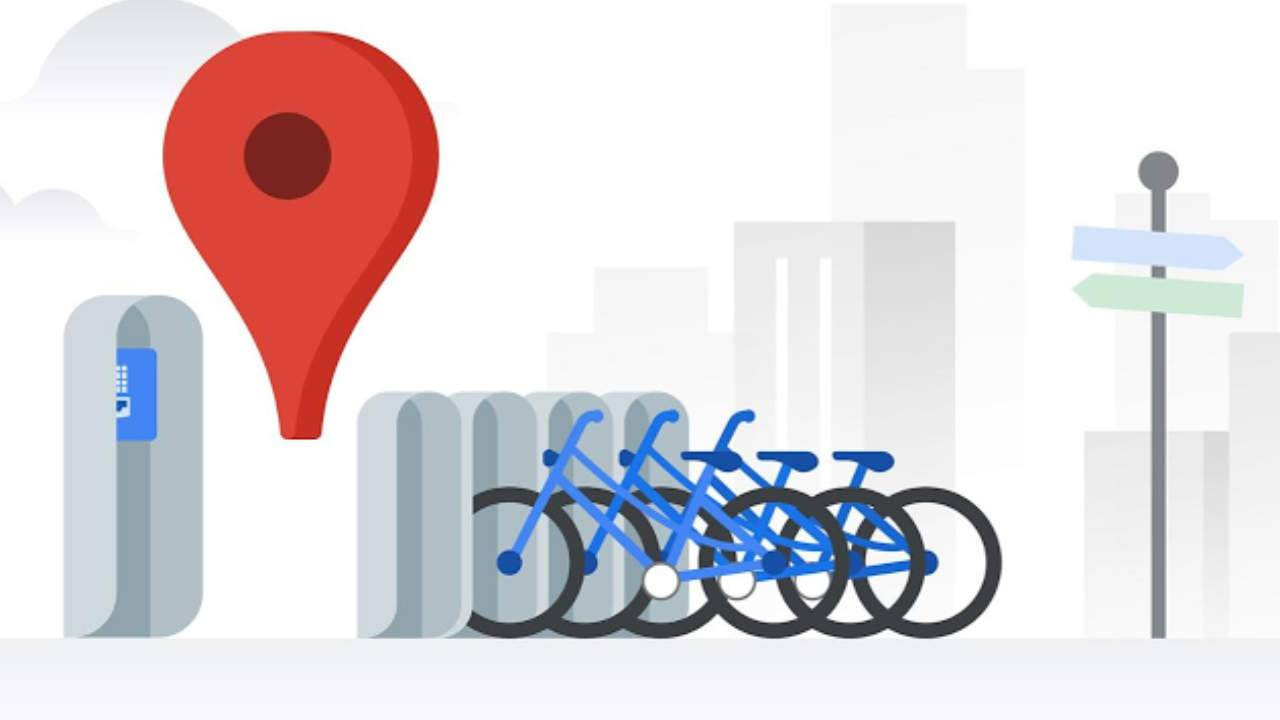

Divvy is a bike share system across Chicago and Evanston. Divvy provides residents and visitors with a convenient, fun and affordable transportation option for getting around and exploring Chicago. There are two kind of users:

* Annual Riders: People who buy an annual membership.

* Casual Riders: People who buy a day pass or a single ride occasionally.



## Ask:

In order to increase Divvy's revenue, the director of marketing would like to propose a new marketing strategy aimed to maximize the number of annual memberships sold by converting casual riders into annual members.

To better understand how annual members and casual riders differ, I have been asked to analyze how annual members and casual riders use Divvy's bikes differently. Data-driven insight into these trends should help the marketing team to define what will be the better commercial strategy to make casual riders more likely to buy an annual membership and to persuade the executive team with recommendations supported with compelling data insights and professional data visualizations to accept the strategy.


## Prepare:

The data used for this analysis was collected directly by Divvy's and pertains to rider patterns over the past twelve months from September 2020 to August 2021. The data was downloaded from the Divvy's website “ https://divvy-tripdata.s3.amazonaws.com/index.html ”. The time frame considered for the analysis was organized as separate files by month and year. The data was provided in .csv files within .zip folders; it is safe to assume that it is credible. Additionally, the data fully complies with the ROCCC criteria:

* Reliable and Original: The data is first-party information.	
* Comprehensive:	Contain all critical information needed to find the solution.
* Current:	The latest file updated in the repository dates from August 2021 at the time this project was published.
* Cited:	The data is provided by the company on its website: https://www.divvybikes.com/system-data 

Note: This data is provided according to the Divvy Data License Agreement and released on a monthly schedule. https://www.divvybikes.com/data-license-agreement. Additionally, privacy is protected by using the “ride_id” instead of the users' personal information.

The data is accurate (the records reflect a unique trip), complete (it provides the columns indicated), consistent (the same kind of data shared among the columns, and files), and trustworthy (first party-information); however, I did notice that:

* Some of the “ended_at”, and “started_at” times indicate that the bicycle was checked out before it was checked in, leading me to assume that those registers are misleading.



* Some “started_at” and “ended_at” fields have a very short difference in terms of time (trips that were below 60 seconds in length), which leads me to believe there is an error in the way this data is being collected, potentially false starts or users trying to re-dock a bike to ensure it was secure. 


* There was also an issue of missing data in some datasets, specifically in columns as "start_station_name", "start_station_id", "end_station_name", "end_station_id", "end_lat", and "end_lng" (irrelevant information to the analysis to perform). Additionally, in some files the information registered in the columns "start_station_id", and "end_station_id" were inconsistent having in the same column different naming conventions.


This data should be sufficient to answer the business problem, considering the caveat mentioned above.

Each file included the following data:

* ride_id: a unique ID per ride.
* rideable_type: the type of bicycle used.
* started_at: the date and time that the bicycle was checked out.
* ended_at: the date and time that the bicycle was checked in.
* start_station_name: the name of the station at the start of the trip.
* start_station_id: a unique identifier for the start station.
* end_station_name: the name of the station at the end of the trip.
* end_station_id: a unique identifier for the end station.
* Start_lat: the latitude of the start station.
* start_lng: the longitude of the start station.
* end_lat: the latitude of the end station.
* end_lng: the longitude of the end station.
* member_casual: a field indicating whether the bicycle was taken about by a member or a casual.


## Process:
To process the data from dirty to clean, I chose to use python. This is because python is relatively fast and thus useful in dealing with huge datasets. Python is also heavily supported by handy open-source libraries such as pandas, numpy, seaborn and matplotlib.

__1. Import data:__ I imported the Pandas and NumPy libraries, and read all the csv files into separate dataframes in Jupiter.

In [25]:
import pandas as pd
import numpy as np

In [26]:
TD202009 = pd.read_csv('202009-divvy-tripdata.csv')
TD202010 = pd.read_csv('202010-divvy-tripdata.csv')
TD202011 = pd.read_csv('202011-divvy-tripdata.csv')
TD202012 = pd.read_csv('202012-divvy-tripdata.csv')
TD202101 = pd.read_csv('202101-divvy-tripdata.csv')
TD202102 = pd.read_csv('202102-divvy-tripdata.csv')
TD202103 = pd.read_csv('202103-divvy-tripdata.csv')
TD202104 = pd.read_csv('202104-divvy-tripdata.csv')
TD202105 = pd.read_csv('202105-divvy-tripdata.csv')
TD202106 = pd.read_csv('202106-divvy-tripdata.csv')
TD202107 = pd.read_csv('202107-divvy-tripdata.csv')
TD202108 = pd.read_csv('202108-divvy-tripdata.csv')

__2. Merge files:__ Before merging the dataframes, I calculated the number of rows in each one and wrote a function to compare the sum of all rows to the final dataframe. Once I merged each dataframe, I ran this function to check if all rows were preserved.

In [27]:
num_rows = (TD202009.shape[0] + TD202010.shape[0] + TD202011.shape[0] + TD202012.shape[0] + TD202101.shape[0] + TD202102.shape[0] + TD202103.shape[0] + TD202104.shape[0] + TD202105.shape[0] + TD202106.shape[0] + TD202107.shape[0] + TD202108.shape[0])
print('Number of Rows in DataFrame :',num_rows)

Number of Rows in DataFrame : 4913072


In [28]:
TD = pd.concat([TD202009,TD202010,TD202011,TD202012,TD202101,TD202102,TD202103,TD202104,TD202105,TD202106,TD202107,TD202108])

__3. Create security copy:__ I made a copy of the TD dataframe as a backup.

In [29]:
TDCopy = TD.copy()

__4. Clean up and add data:__ It's important to prepare the data for the analysis and to ensure that the data's integrity. So, I followed the next steps.

Firstly, I applied functions to removed any duplicate of the data (No record was duplicated), and to identify columns with missing values.

In [30]:
TD.drop_duplicates(inplace=True)

In [31]:
TD.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    450045
start_station_id      450571
end_station_name      491380
end_station_id        491764
start_lat                  0
start_lng                  0
end_lat                 5015
end_lng                 5015
member_casual              0
dtype: int64

Secondly, I formatted the data in columns "started_at", and "ended_at" as datetime, then I created a "ride_length" column with a formula to subtract the "started_at" value from the "ended_at" value, and after that, I sorted the values by ride length in ascending order.

In [32]:
TD['started_at'] = pd.to_datetime(TD['started_at'])
TD['ended_at'] = pd.to_datetime(TD['ended_at'])
TD['ride_length'] = TD ['ended_at'] - TD ['started_at']

In [33]:
TD.sort_values(by=['ride_length'])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
61163,3ED2B8BCE6A914EF,electric_bike,2020-12-15 12:10:14,2020-11-25 08:00:16,Wells St & Concord Ln,TA1308000050,Clark St & Schiller St,TA1309000024,41.911960,-87.634798,41.907917,-87.631583,member,-21 days +19:50:02
26808,6DF34F98F5DB335F,electric_bike,2020-12-15 11:35:39,2020-11-25 07:40:56,Sheffield Ave & Willow St,TA1306000032,Sheffield Ave & Willow St,TA1306000032,41.913769,-87.652842,41.913745,-87.652846,member,-21 days +20:05:17
25965,BE1F691E387D7072,docked_bike,2020-12-15 11:34:23,2020-11-25 08:00:15,Kingsbury St & Kinzie St,KA1503000043,Canal St & Monroe St,13056,41.889176,-87.638505,41.881690,-87.639530,member,-21 days +20:25:52
87858,321F7AE3AEDBAA13,docked_bike,2020-12-15 12:12:43,2020-11-25 08:42:16,Dayton St & North Ave,13058,Sheffield Ave & Kingsbury St,13154,41.910578,-87.649421,41.910522,-87.653106,member,-21 days +20:29:33
90888,BB4697B59E3FF12A,docked_bike,2020-12-15 11:34:38,2020-11-25 08:09:43,Clark St & 9th St (AMLI),SL-009,Dearborn St & Adams St,TA1305000005,41.870816,-87.631246,41.879356,-87.629791,member,-21 days +20:35:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,36 days 14:21:23
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,37 days 10:41:36
236102,F6A59D72627F2711,docked_bike,2020-09-02 18:34:33,2020-10-10 11:17:54,Rush St & Superior St,161.0,Kingsbury St & Kinzie St,133.0,41.895765,-87.625908,41.889177,-87.638506,casual,37 days 16:43:21
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,38 days 16:11:41


I deleted the rides where "ride_length" was negative or < 60 seconds ( I consider that the data to be eliminated is incorrect and inaccurate because it's impossible to finish a trip before start it, and because trips that were below 60 seconds in length are probably error in the way that data was collected, potentially false starts or users trying to re-dock a bike to ensure it was secure). 

In [34]:
TD.drop(TD[TD['ride_length'] < pd.Timedelta(60, unit='s')].index, inplace=True)

I created three columns:


1. “day_of_week” column to return the name of the day of the week that each bicycle was checked in.

2. "month" column to return the name of the month that each bicycle was checked in. 

3. "ride_length_min" columns to return the length of each ride in minutes.

In [35]:
day_of_week = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
TD['day_of_week'] = TD['started_at'].dt.dayofweek.map(day_of_week)

In [36]:
month = {1:'January', 2:'February',3:'March', 4:'April',5:'May', 6:'June', 7:'July', 8:'August',9:'September', 10:'October',11:'November', 12:'December'}
TD['month'] = TD['started_at'].dt.month.map(month)

In [37]:
TD['ride_length_min'] = (TD['ride_length'].astype('timedelta64[s]')/60).round(2)

Lastly, I sorted in ascending order the "start_station_name", and "end_station_name" to identify busiest stations.

In [38]:
TD['start_station_name'].value_counts(ascending=True)

North Ave & New England Ave          1
N Hampden Ct & W Diversey Ave        1
N Damen Ave & W Wabansia St          1
Harlem Ave & Grace St                2
351                                  2
                                 ...  
Wells St & Concord Ln            34363
Millennium Park                  34471
Clark St & Elm St                35004
Michigan Ave & Oak St            37379
Streeter Dr & Grand Ave          64524
Name: start_station_name, Length: 756, dtype: int64

In [39]:
TD['end_station_name'].value_counts(ascending=True)

North Ave & New England Ave            1
Lyft Driver Center Private Rack        1
Harlem Ave & Grace St                  1
Pulaski Rd & 21st St                   2
Kildare Ave & 26th St                  2
                                   ...  
Wells St & Concord Ln              35253
Theater on the Lake                35329
Millennium Park                    36155
Michigan Ave & Oak St              37964
Streeter Dr & Grand Ave            65854
Name: end_station_name, Length: 754, dtype: int64

__5. Export data:__
I exported the dataframe "TD" as a csv file.

In [40]:
TD.to_csv('TD.csv',index=False)

## Analize:

I analyzed the cleaned data to find out how annual members and casual riders use Divvy's bikes differently.

First, I got the total number of rides and established the proportion of them that were taken by casual riders and member riders. Then, I examined how total rides were distributed per month and then per day. 

__Interesting Data__:
* 54.56%of all trips were made by members, while the remaining 45.4% of trips were taken by casual riders.
* The month with the highest trip was July 2021, while the month with the fewest trips was February 2021.
* Divvy's riders tend to use the services more on Fridays, Saturdays, and Sundays.

Next, I examined how rides between the rider category compared in a given month of the year and day of the week. The goal at this point was to find out whether casual riders had a preference for certain days or months compared with member riders.

__Interesting Data:__ 
* Casual riders tend to use the Divvy's services more during the weekends, while member riders use them more on weekdays.
* Over the year, Saturday was the busiest day of the week for casual riders, and Wednesday for member riders. While, Wednesday had the fewest rides by casuals and Sunday had the fewest rides by members.
* June, July, and August are months where casual riders take more trips than member riders.


Next, I wanted to compare the difference in average ride length between casual riders and member riders by month and day. In this step I discovered that casual riders tend to ride for longer periods of time compared to member riders. 

__Interesting Data:__ 
* The trips for casuals riders were longer on average than those for members riders.
* February was the month with the longest average trip length, and December had the shortest average trip length.
* Sunday was the day with the longest average trip length, and Thursday had the shortest average trip length.

Finally I compared the type of bike hired versus the rider category.

__Interesting Data:__ 
* The rideable types indicated that classic bikes were the most popular all around, followed by electric bikes and docked bikes in last place. This trend was consistent across members and casual riders.

## Share:
I created intuitive visualizations using Tableau, and Microsoft Excel to communicate the results of my analysis. The visualizations and insights gleaned can be found [here](https://1drv.ms/p/s!Ah4vVoijc8xysifGyD7a8Y_qONvc?e=dxpoRd).

## Act: 
Based on the analysis above, these are my top recommendations:

* It is a fact that casual riders ride longer than member riders, so, it is important to use this information to create a marketing campaign that evidence with data how casual riders could save money by purchasing annual memberships instead of buying day passes or single rides.



* Run marketing campaigns targeting casual riders around the stations which have the highest number of start or end rides.



* Run marketing campaigns targeting casual riders during summer months, especially on weekends.



